Catherine Johanna Rojas Mendoza
A01798149
26/08/24

# **Ses02_Challenge.pdf**

It has happened. Aliens have arrived. They hail from a planet called Valhalla-23,
where the temperature is measured in Valks. These visitors tell you that they have
come to solve Earth’s global warming crisis*. They offer you a machine that will
solve the problem, but they warn you:
1. The machine must be set up in Valks.
2. If you input a wrong temperature value, you may end up freezing or scorching
the Earth.
3. No one knows how to transform between Celsius and Valks.
† You are tasked with finding a model for solving this problem, so you ask Humans
and Valkians to collect temperature readings from several objects. The data are given
in the Valhalla23.csv file



In [1]:
# Importar módulos
import pandas as pd                                       # para cargar datos
from sklearn.model_selection import train_test_split      # train_test_split
from sklearn.linear_model import LinearRegression         # regresión y clasificación
from sklearn.metrics import mean_squared_error, r2_score  # para puntajes

In [2]:
# Cargar datos
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Inteligencia Artificial Avanzada para la Ciencia de Datos/Machine Learning/Regresion lineal/Vallhala/Valhalla23.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Seleccionar las variables independiente (Celsius) y dependiente (Valks)
X = df[['Celsius']].values
y = df['Valks'].values

In [4]:
# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

El código divide el conjunto de datos en un 80% para entrenamiento y un 20% para prueba, lo cual es una práctica común para evaluar el rendimiento del modelo. Al probar otras divisiones, como 70% para entrenamiento y 30% para prueba, las métricas de evaluación mostraron una ligera disminución en los puntajes del conjunto de entrenamiento y prueba, mientras que el error cuadrático medio aumentó en aproximadamente 4 unidades. Posteriormente, al probar con una división de 90% para entrenamiento y 10% para prueba, se observó un pequeño incremento en el puntaje del entrenamiento, pero un descenso en el puntaje del conjunto de prueba, junto con un aumento significativo en el error cuadrático medio de alrededor de 8 unidades en comparación con la división 80-20. Analizando estos resultados, se decidió utilizar la división 80-20 para entrenar el modelo.


En este caso, el modelo implementado, LinearRegression utiliza una solución analítica para calcular los coeficientes óptimos de la regresión lineal. Esto se realiza mediante una fórmula matemática que encuentra directamente la mejor línea que minimiza el error cuadrático medio. Por ello no se manejan parámetros como el número de iteraciones, la tasa de aprendizaje o valores iniciales.

Sin emabargo, se podría aplicar un modelo SGDRegressor si buscaramos más flexibilidad en el control del proceso de optimización, ya que este permite ajustar estos parámetros, ya que usa un enfoque iterativo (descenso de gradiente) para encontrar la solución pero a costa de una mayor complejidad y potenciales desafíos, como la necesidad de seleccionar adecuadamente los hiperparámetros.

In [5]:
# Evaluar el modelo usando el método score
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("Train Score:", train_score)
print("Test Score:", test_score)

# Evaluar el modelo usando métricas
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Train Score: 0.993035561819186
Test Score: 0.9976240798987097
Mean Squared Error: 20.18813776711824
Root Mean Squared Error: 4.493121160965753
R-squared: 0.9976240798987097


Los valores de R^2 tanto en el conjunto de entrenamiento como en el de prueba son extremadamente altos, lo que indica que el modelo tiene un excelente ajuste a los datos y generaliza muy bien a datos no vistos, por lo que se puede decir que tiene un alto rendimiento.

Los valores de MSE y RMSE son bajos, lo que indica que el modelo realiza predicciones muy precisas y que los errores de predicción son pequeños.

Dado que el test score es incluso un poco mayor que el train score, no parece haber sobreajuste, lo cual es un buen indicativo de que el modelo está bien ajustado y es robusto.

Estos resultados indican que el modelo entrenado es altamente efectivo para predecir la relación entre Celsius y Valks en los datos que se han utilizado.

In [6]:
# Imprimir los coeficientes del modelo
print("Intercepto (theta_0):", model.intercept_)
print("Coeficientes (theta_1):", model.coef_)

Intercepto (theta_0): 49.53876671222612
Coeficientes (theta_1): [-2.98117122]


$$
\text{Valks} = \theta_0 + \theta_1 \times \text{Celsius}
$$

Donde:

- $\theta_0$ es el intercepto.
- $\theta_1$ es el coeficiente (la pendiente de la línea de regresión).
- Celsius es la variable independiente.

Con los valores específicos que has proporcionado:

$$
\theta_0 = 49.53876671222612
$$

$$
\theta_1 = -2.98117122
$$

La fórmula matemática del modelo sería:

$$
\text{Valks} = 49.53876671222612 - 2.98117122 \times \text{Celsius}
$$


Esta fórmula permite predecir el valor de Valks para cualquier valor dado de Celsius.


El coeficiente negativo sugiere que existe una relación inversa entre Celsius y Valks, es decir, cuando una aumenta, la otra disminuye.
La magnitud del coeficiente indica que la temperatura en Valks cambia significativamente (casi 3 unidades) por cada grado de cambio en Celsius, lo cual es un cambio notable.
Esto quiere decir que el modelo predice que, sin importar el valor exacto de Celsius, el valor en Valks comenzará en aproximadamente 49.54 cuando Celsius es 0 y luego disminuirá a una tasa de aproximadamente 2.98 Valks por cada grado Celsius adicional.



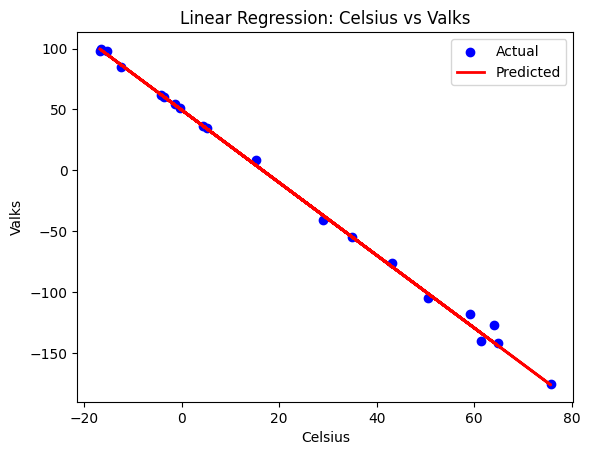

     Celsius  Predicted Valks
0   34.97200       -54.718753
1   -3.73880        60.684770
2   64.07200      -141.470836
3   28.97600       -36.843651
4   -1.31270        53.452150
5  -16.55500        98.892056
6   64.91300      -143.978001
7   15.16600         4.326324
8   -4.23870        62.175057
9   61.47200      -133.719791
10  59.22100      -127.009174
11  50.60500      -101.323403
12   4.35250        36.563219
13 -15.38300        95.398124
14 -12.41500        86.550007
15  43.23600       -79.355152
16  -0.34047        50.553766
17   5.10840        34.309752
18  75.71700      -176.186575
19 -16.81700        99.673123


In [7]:
import matplotlib.pyplot as plt

# Visualizar los resultados
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Celsius')
plt.ylabel('Valks')
plt.title('Linear Regression: Celsius vs Valks')
plt.legend()
plt.show()

# Mostrar los valores predichos
predicciones = pd.DataFrame({'Celsius': X_test.flatten(), 'Predicted Valks': y_pred})
print(predicciones)

La gráfica confirma visualmente que el modelo de regresión lineal es adecuado para describir la relación entre Celsius y Valks en el conjunto de datos, y proporciona predicciones precisas. La relación lineal inversa es claramente visible y bien capturada por el modelo.

In [13]:
!jupyter nbconvert --to html "/content/drive/MyDrive/ColabNotebooks/Ses02_Challenge.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/ColabNotebooks/Ses02_Challenge.ipynb to html
[NbConvertApp] Writing 631446 bytes to /content/drive/MyDrive/ColabNotebooks/Ses02_Challenge.html
